# MNIST Neural Network

Mini working example of training a neural network. 

***
**Part 1/4: Loading and Inspection**
* MNIST is a data set of labeled images of 
    *hand-written digits (0-9)*

* We can load MNIST with `tf.keras.datasets.mnist.load_data()`
* Let's see what this data looks like!

In [1]:
import tensorflow as tf
import numpy as np

(training_images, training_labels), \
(testing_images,  testing_labels) = \
    tf.keras.datasets.mnist.load_data()

print('MNIST training images info: ' + 
    '\n ... type:'  + str(type(training_images)) + 
    '\n ... shape:' + str(training_images.shape) + 
    '\n ... data:'  + str(str(training_images.dtype)))

print('\n MNIST training labels info: ' + 
    '\n ... type:'  + str(type(training_labels)) + 
    '\n ... shape:' + str(training_labels.shape) + 
    '\n ... data:'  + str(training_labels.dtype) + 
    '\n ... unique:'+ str(np.unique(training_labels)))

print('\n MNIST testing images info: ' + 
    '\n ... type:'  + str(type(testing_images)) + 
    '\n ... shape:' + str(testing_images.shape) + 
    '\n ... data:'  + str(str(testing_images.dtype)))

print('\n MNIST testing labels info: ' + 
    '\n ... type:'  + str(type(testing_labels)) + 
    '\n ... shape:' + str(testing_labels.shape) + 
    '\n ... data:'  + str(testing_labels.dtype) + 
    '\n ... unique:'+ str(np.unique(testing_labels)))

MNIST training images info: 
 ... type:<class 'numpy.ndarray'>
 ... shape:(60000, 28, 28)
 ... data:uint8

 MNIST training labels info: 
 ... type:<class 'numpy.ndarray'>
 ... shape:(60000,)
 ... data:uint8
 ... unique:[0 1 2 3 4 5 6 7 8 9]

 MNIST testing images info: 
 ... type:<class 'numpy.ndarray'>
 ... shape:(10000, 28, 28)
 ... data:uint8

 MNIST testing labels info: 
 ... type:<class 'numpy.ndarray'>
 ... shape:(10000,)
 ... data:uint8
 ... unique:[0 1 2 3 4 5 6 7 8 9]


**Part 2/4: Visualization**
* There appear to be 60,000 images for training and 10,000 images for testing
* Each image is 28x28, grayscale
* The first 40 training images are plotted with matplotlib

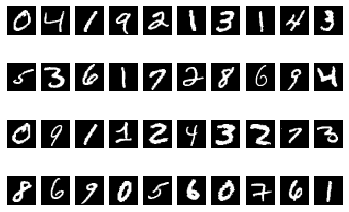

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure();

for i in range(1,41):
    fig.add_subplot(4,10,i);
    plt.axis('off');
    plt.imshow(training_images[i,:,:], cmap='gray');

**Part 3/4: Preparation**
* Pixel brightnesses are recast as floats with value in range 0-1
* Image tensors are given an extra dimension to play nice with keras
* Each label was originally a number between 0-9.  Now, each label is a 'one-hot' vector. For instance, the label "0" is now [1,0,0,0,0,0,0,0,0,0,0]

In [2]:
training_images = training_images.astype('float32')/255
training_images = training_images.reshape(60000,28,28,1)

testing_images  = testing_images.astype('float32')/255
testing_images  = testing_images.reshape(10000,28,28,1)

training_labels = tf.keras.utils.to_categorical(training_labels, 10)
testing_labels  = tf.keras.utils.to_categorical(testing_labels, 10)

print('training_labels new shape: {}'.format(training_labels.shape))
print('testing_labels new shape: {}'.format(testing_labels.shape))

training_labels new shape: (60000, 10)
testing_labels new shape: (10000, 10)


**Part 4/4: Training**
* A mini-neural network classifier is made using keras. The purpose is to train the data quickly.  
* The model is defined, compiled, and then fit to the MNIST data

In [32]:
L = tf.keras.layers

model = tf.keras.models.Sequential([
    L.Flatten(input_shape=(28,28,1)),  
    L.Dense(128,activation='relu'),
    L.Dense(10, activation='softmax')])

model.compile(
    metrics=['accuracy'],
    loss='mean_squared_error', 
    optimizer='sgd')

model.fit(
    training_images, training_labels, 
    batch_size=16,
    epochs=10, 
    verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 - 7s - loss: 0.0828 - accuracy: 0.3531
Epoch 2/10
60000/60000 - 9s - loss: 0.0564 - accuracy: 0.6813
Epoch 3/10
60000/60000 - 9s - loss: 0.0388 - accuracy: 0.7895
Epoch 4/10
60000/60000 - 9s - loss: 0.0298 - accuracy: 0.8397
Epoch 5/10
60000/60000 - 9s - loss: 0.0250 - accuracy: 0.8621
Epoch 6/10
60000/60000 - 9s - loss: 0.0223 - accuracy: 0.8743
Epoch 7/10
60000/60000 - 9s - loss: 0.0205 - accuracy: 0.8813
Epoch 8/10
60000/60000 - 9s - loss: 0.0192 - accuracy: 0.8872
Epoch 9/10
60000/60000 - 9s - loss: 0.0182 - accuracy: 0.8914
Epoch 10/10
60000/60000 - 9s - loss: 0.0174 - accuracy: 0.8946


$\tiny\text{\$#}$